<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/MNIST_tuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
pip install keras-tuner

In [148]:
import tensorflow
import tensorflow.keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import kerastuner as k
from tensorflow.keras.callbacks import EarlyStopping

tensorflow.keras has some inbuilt datasets that we can import
keras.io/api/datasets

In [110]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data() will give the total data

In [111]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [112]:
x_train.shape

(60000, 28, 28)

In [113]:
x_test.shape

(10000, 28, 28)

In [114]:
y_train.shape

(60000,)

imshow in matplotlib shows the image

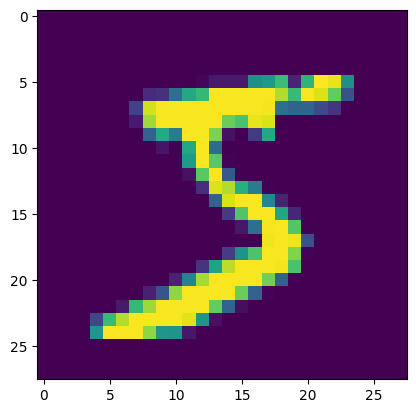

In [115]:
plt.imshow(x_train[0])

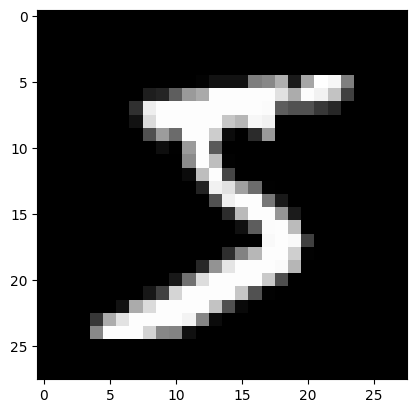

In [116]:
plt.imshow(x_train[0],cmap='gray')

keras also has another layer called Flatten. It will take any n-dim and convert to 1-d array

In [117]:
# We better normalize the data
# since it is a image data we can divide with 255 to normalize it
x_train = x_train/255
x_test = x_test/255

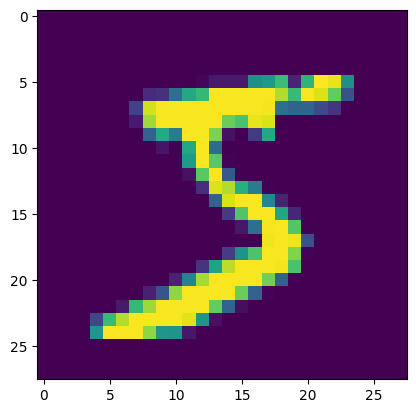

In [118]:
plt.imshow(x_train[0])

In [119]:
# use both Int and Choice
def tuners(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))

    for y in range(hp.Int("no.of hidden layers",1,5)):
         model.add(Dense(units=(hp.Int("neurons{}".format(y),30,100)),activation= hp.Choice("activation in {} hidden layer".format(y),values=['sigmoid','tanh','relu']),
                            kernel_initializer=hp.Choice("Initializer in {} hidden layer".format(y),values=['glorot_uniform','glorot_normal','he_uniform','he_normal'])
                            ))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=hp.Choice("optimizer",values=['adam','adadelta','sgd']) ,metrics=['accuracy'])
    return model



In [124]:
tuner_obj = k.RandomSearch(tuners,max_trials=10,objective='val_accuracy',directory='folder5')

In [125]:
tuner_obj

In [126]:
es = EarlyStopping(monitor='val_accuracy',min_delta=0.1,patience=3,verbose=1)

In [127]:
tuner_obj.search(x_train,y_train,batch_size=100,epochs=50,validation_split=0.2,callbacks=[es]) # here actual training starts

Trial 10 Complete [00h 00m 15s]
val_accuracy: 0.9040833115577698

Best val_accuracy So Far: 0.9664999842643738
Total elapsed time: 00h 02m 38s


In [128]:
tuner_obj.results_summary()

Results summary
Results in folder5/untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
no.of hidden layers: 5
neurons0: 66
activation in 0 hidden layer: tanh
Initializer in 0 hidden layer: glorot_normal
optimizer: adam
neurons1: 42
activation in 1 hidden layer: relu
Initializer in 1 hidden layer: glorot_uniform
neurons2: 69
activation in 2 hidden layer: tanh
Initializer in 2 hidden layer: he_normal
neurons3: 76
activation in 3 hidden layer: tanh
Initializer in 3 hidden layer: glorot_normal
neurons4: 58
activation in 4 hidden layer: tanh
Initializer in 4 hidden layer: he_uniform
Score: 0.9664999842643738

Trial 05 summary
Hyperparameters:
no.of hidden layers: 2
neurons0: 47
activation in 0 hidden layer: tanh
Initializer in 0 hidden layer: he_normal
optimizer: adam
neurons1: 90
activation in 1 hidden layer: relu
Initializer in 1 hidden layer: he_normal
neurons2: 38
activation in 2 hidden layer: tanh
Initializer in 2 h

In [129]:
tuner_obj.get_best_hyperparameters()[0].values

{'no.of hidden layers': 5,
 'neurons0': 66,
 'activation in 0 hidden layer': 'tanh',
 'Initializer in 0 hidden layer': 'glorot_normal',
 'optimizer': 'adam',
 'neurons1': 42,
 'activation in 1 hidden layer': 'relu',
 'Initializer in 1 hidden layer': 'glorot_uniform',
 'neurons2': 69,
 'activation in 2 hidden layer': 'tanh',
 'Initializer in 2 hidden layer': 'he_normal',
 'neurons3': 76,
 'activation in 3 hidden layer': 'tanh',
 'Initializer in 3 hidden layer': 'glorot_normal',
 'neurons4': 58,
 'activation in 4 hidden layer': 'tanh',
 'Initializer in 4 hidden layer': 'he_uniform'}

In [130]:
model = tuner_obj.get_best_models(num_models=1)[0]

In [131]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 66)                51810     
                                                                 
 dense_1 (Dense)             (None, 42)                2814      
                                                                 
 dense_2 (Dense)             (None, 69)                2967      
                                                                 
 dense_3 (Dense)             (None, 76)                5320      
                                                                 
 dense_4 (Dense)             (None, 58)                4466      
                                                                 
 dense_5 (Dense)             (None, 10)                5

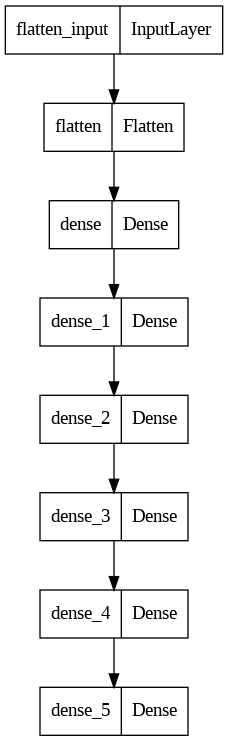

In [132]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [133]:
history = model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 12s 6ms/step - loss: 0.1150 - accuracy: 0.9643 - val_loss: 0.1166 - val_accuracy: 0.9657
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0795 - accuracy: 0.9755 - val_loss: 0.1201 - val_accuracy: 0.9668
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.1219 - val_accuracy: 0.9663
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0576 - accuracy: 0.9820 - val_loss: 0.1194 - val_accuracy: 0.9668
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.1133 - val_accuracy: 0.9683
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.1136 - val_accuracy: 0.9709
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0409 - accuracy: 0.9865 - val_loss: 0.1059 - val_accuracy

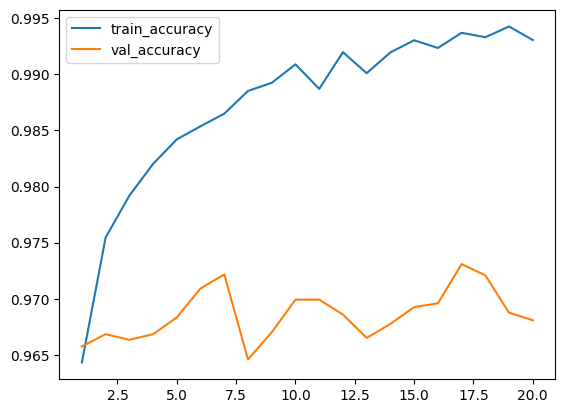

In [134]:
plt.plot(range(1,21),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,21),history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [161]:
# Heavy overfitting.
# We will use this architechture and build a new model and add Dropout to it
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(66,activation='tanh',kernel_initializer='glorot_normal'))
model1.add(Dense(42,activation='relu',kernel_initializer='glorot_uniform'))
model1.add(Dense(69,activation='tanh',kernel_initializer='he_normal'))
model1.add(Dropout(0.1))
model1.add(Dense(76,activation='tanh',kernel_initializer='glorot_normal'))
model1.add(Dropout(0.2))
model1.add(Dense(58,activation='tanh',kernel_initializer='he_uniform'))
model1.add(Dense(10,activation='softmax'))


model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])


In [162]:
history1 = model1.fit(x_train,y_train,epochs=20,validation_split=0.2,callbacks=[es])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3341 - accuracy: 0.8998 - val_loss: 0.1808 - val_accuracy: 0.9457
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1673 - accuracy: 0.9514 - val_loss: 0.1515 - val_accuracy: 0.9553
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1286 - accuracy: 0.9625 - val_loss: 0.1195 - val_accuracy: 0.9660
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1067 - accuracy: 0.9682 - val_loss: 0.1241 - val_accuracy: 0.9637
Epoch 4: early stopping


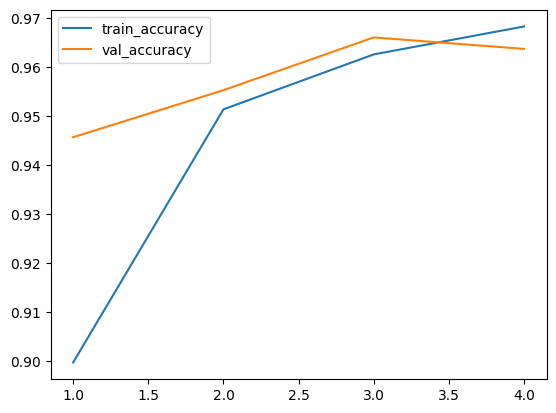

In [163]:
plt.plot(range(1,5),history1.history["accuracy"],label="train_accuracy")
plt.plot(range(1,5),history1.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [164]:
predict = np.argmax(model1.predict(x_test),axis=1) # row wise we want to get the index value of highest probability, so classification prediction done

313/313 [==============================] - 1s 3ms/step


In [165]:
accuracy_score(y_test,predict)

0.964

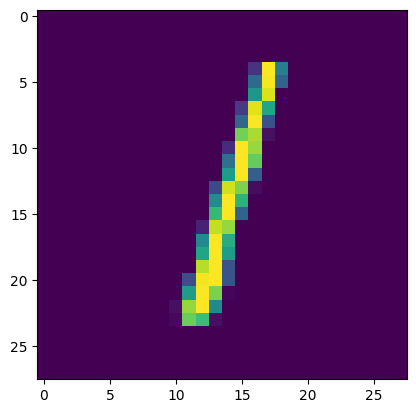

In [166]:
plt.imshow(x_test[2])

In [167]:
print(predict[2])

1
